In [66]:
#19/2/2023
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [67]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [68]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


In [69]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [70]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As you can see there are no null values lets check for the Duplicates

In [71]:
df.duplicated().sum() #no duplicate values

np.int64(0)

In [72]:
#Droping unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

for ML model we do not need the above columns for evaluting the model

In [73]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


    CreditScore: The credit score of the customer
    Geography: The country from which the customer
    Gender : Male or Female
    Age: The age of the customer
    Tenure: The number of years for which the customer has been with the bank
    Balance: The bank balance of the customer
    NumOfProducts: The number of bank products the customer is utilising
    HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
    IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
    EstimatedSalary: The estimated salary of the customer in Dollars
    Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

**Skewness**

In [74]:
#checking the numerical columns within Dataset
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='str')

CreditScore
-0.07159586676212397


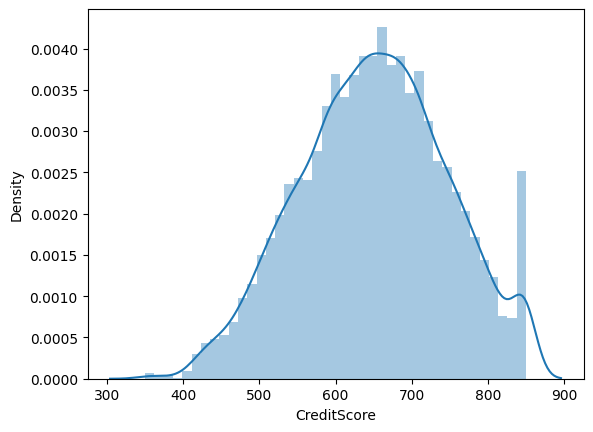

Age
1.0111685586628076


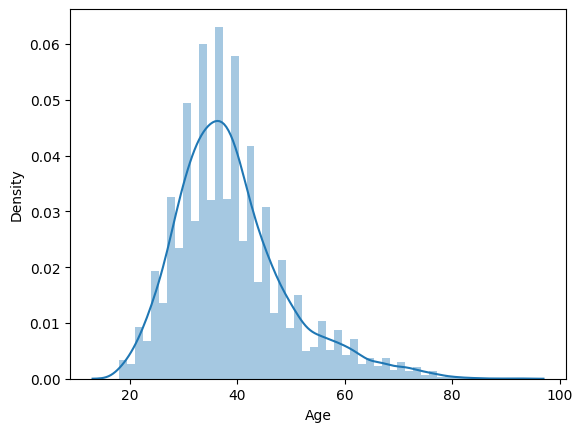

Tenure
0.010989809189781038


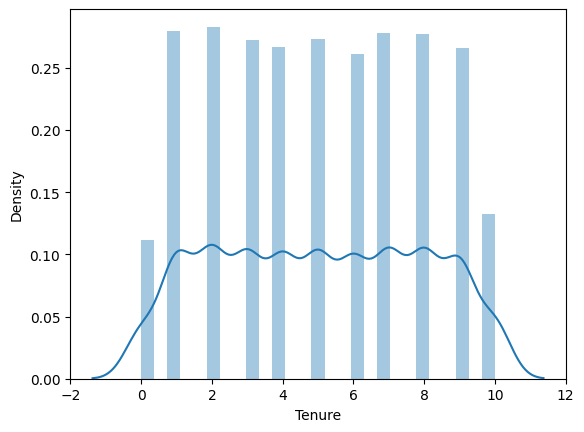

Balance
-0.14108754375291138


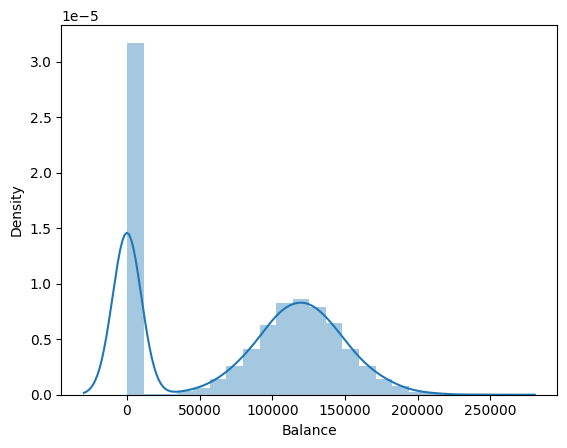

NumOfProducts
0.745456048438949


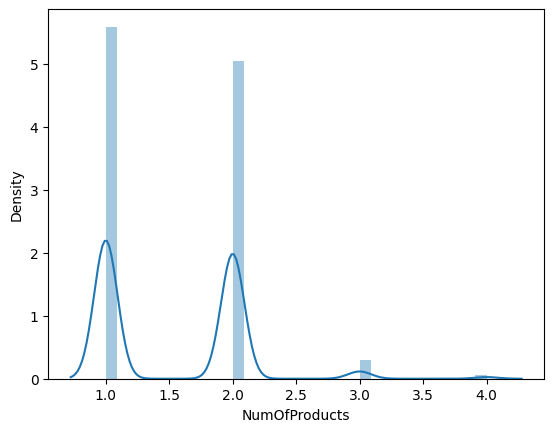

HasCrCard
-0.9016763178640541


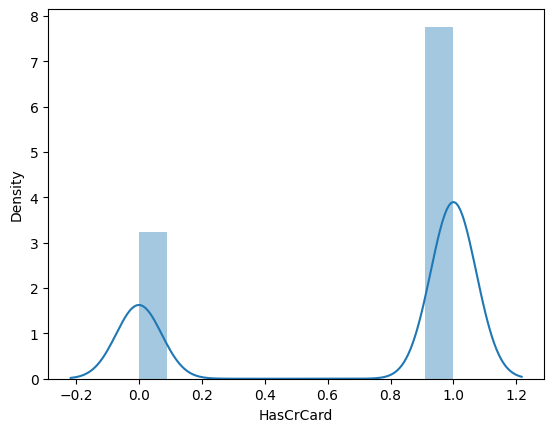

IsActiveMember
-0.06042756246298516


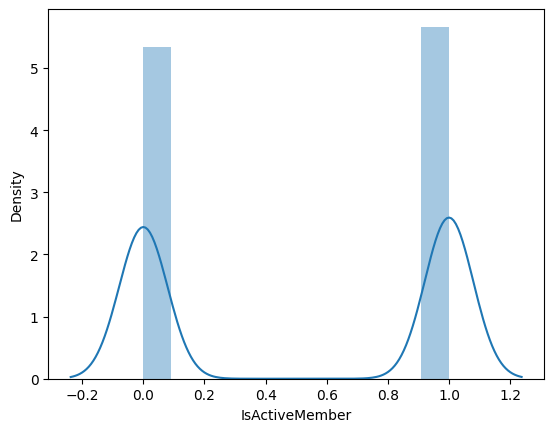

EstimatedSalary
0.0020850448448748813


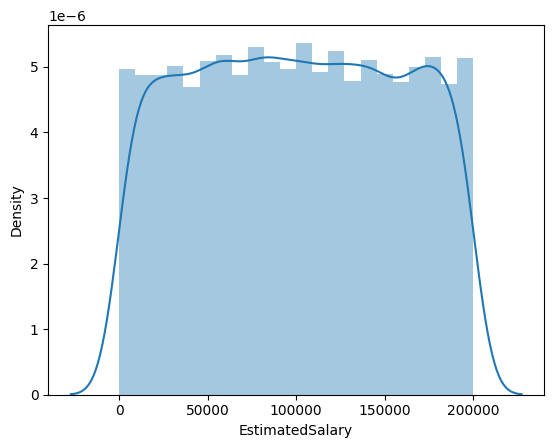

Exited
1.4713899141398696


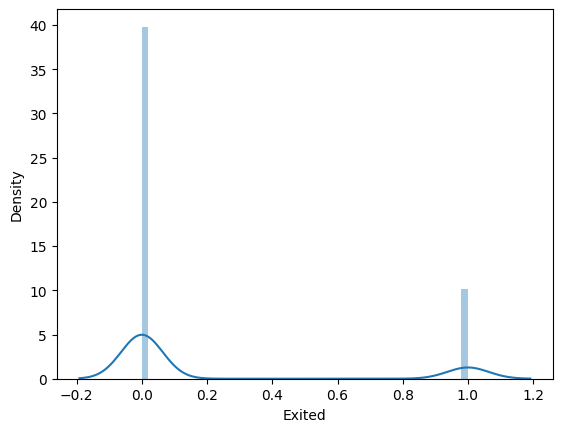

In [75]:
#lets check the skewness for all numerical columns
from scipy.stats import skew
for i in num_col:
    print(i)
    print(skew(df[i]))
    
    plt.figure()
    sns.distplot(df[i])  #we use the distplot to view the skewness...
    plt.show()

<Axes: >

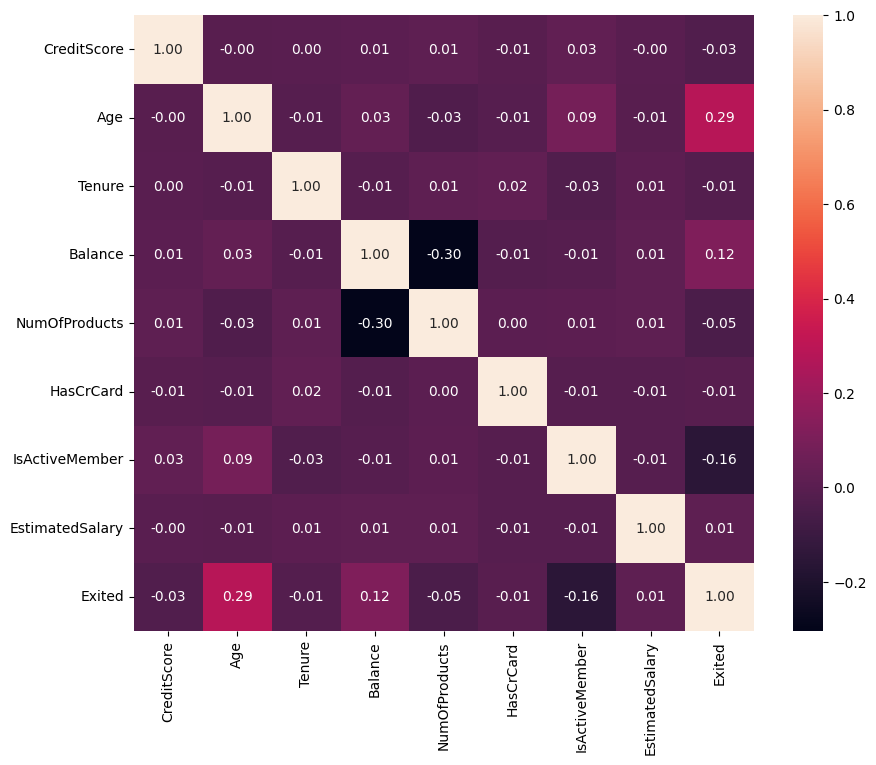

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f')
#before assigning the skewness we need to check the heatmap if its have +ve co-reln with the output colm then no need to change the skewness

    now as you check,
    
    CreditScore          (it has -ve skewness dont trasnform/do not remove skewness)
    Age                  (need to change the skewness values) 
    Tenure               (it has -ve skewness dont trasnform/do not remove skewness)    
    Balance              (it has -ve skewness dont trasnform/do not remove skewness)
    NumOfProducts        (it has -ve skewness dont trasnform/do not remove skewness)
    HasCrCard            (it has -ve skewness dont trasnform/do not remove skewness)
    IsActiveMember       (it has -ve skewness dont trasnform/do not remove skewness)
    EstimatedSalary      (it skewness is 0.002 which is good so dont trasnform/do not remove skewness)

In [77]:
df['Age']=np.log(df['Age']) #changing the age skewness using log menthod

0.18199280840499774


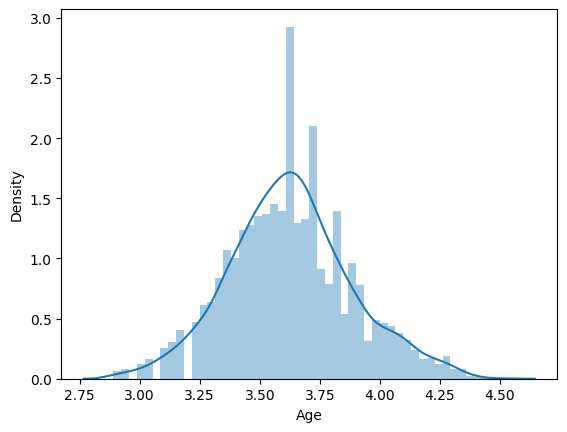

In [78]:
print(skew(df['Age']))

plt.figure()
sns.distplot(df['Age'])
plt.show() #as you see its showing the normal distrution as skewness is nice

**Encoding**

In [79]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['Geography', 'Gender'], dtype='str')

In [80]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [81]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder() #making objects
oe.fit_transform(df[["Geography",'Gender']]) #as you can see you can pass two columns over here..

array([[0., 0.],
       [2., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 1.],
       [0., 0.]], shape=(10000, 2))

In [82]:
df[cat_col]=oe.fit_transform(df[cat_col])

In [83]:
df['Gender'].value_counts() #checking if the encoding has been done

Gender
1.0    5457
0.0    4543
Name: count, dtype: int64

In [84]:
df['Geography'].value_counts() #checking if the encoding has been done

Geography
0.0    5014
1.0    2509
2.0    2477
Name: count, dtype: int64

**lets seprate x(features) Seprate x--> 2D & y(target) y--> 1D**

In [85]:
x=df.iloc[:,:-1]
y=df['Exited']

In [86]:
x.ndim

2

In [87]:
y.ndim

1

**splitting dataset in xtest,ytest,xtrain.ytrain**

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# LogisticRegression and HPT

In [90]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [91]:
from sklearn.metrics import accuracy_score,classification_report
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f'Accuracy Report {ac}')
print()
print(f'Classifcation report {cr}')

Accuracy Report 0.7903333333333333

Classifcation report               precision    recall  f1-score   support

           0       0.79      0.99      0.88      2373
           1       0.47      0.03      0.05       627

    accuracy                           0.79      3000
   macro avg       0.63      0.51      0.47      3000
weighted avg       0.73      0.79      0.71      3000



as you can see the accuracy is 0.79, lets check with hyper tunning 

In [92]:
logreg=LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred1=logreg.predict(xtest)
#changing the solver to "saga"

In [93]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2373
           1       0.00      0.00      0.00       627

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



In [94]:
#feture scaling to improve the accuracy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [95]:
logreg=LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred3=logreg.predict(xtest)

In [96]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.68      0.21      0.33       627

    accuracy                           0.81      3000
   macro avg       0.75      0.59      0.61      3000
weighted avg       0.79      0.81      0.77      3000



using HPT we have increased the accuracy by 0.02 let check if it is perfect fit model?

In [97]:
logreg.score(xtrain,ytrain)

0.8144285714285714

In [98]:
logreg.score(xtest,ytest)

0.8146666666666667

In [99]:
#low bias High Variance

# SVC with HPT

In [100]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [101]:
from sklearn.svm import SVC #import SVC for svm
svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2373
           1       0.83      0.39      0.53       627

    accuracy                           0.86      3000
   macro avg       0.85      0.68      0.72      3000
weighted avg       0.85      0.86      0.83      3000



In [102]:
svm.score(xtrain,ytrain)

0.8624285714285714

In [103]:
svm.score(xtest,ytest)

0.856

In [104]:
svm=SVC(kernel="poly")
svm.fit(xtrain,ytrain)
ypred10=svm.predict(xtest)
print(classification_report(ytest,ypred10))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2373
           1       0.88      0.34      0.49       627

    accuracy                           0.85      3000
   macro avg       0.86      0.66      0.70      3000
weighted avg       0.86      0.85      0.82      3000



In [105]:
#as you can see the SVC is perfect model and giving accuracy of 0.85, lets check for knn as well

# KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #this is my K value #step2=making object #k by defualt 5..
knn.fit(xtrain,ytrain) #step3=traing the data
ypred=knn.predict(xtest) #step4=predicting value

In [107]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2373
           1       0.64      0.37      0.47       627

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.81      0.82      0.81      3000



In [108]:
ac_list=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)    
    
    ac=accuracy_score(ytest,ypred)
    ac_list.append(ac)

In [109]:
a=pd.DataFrame(ac_list,range(1,31)).reset_index()
a

,index,0
0,1,0.792000
1,2,0.819333
2,3,0.815333
3,4,0.823667
4,5,0.825000
5,6,0.828000
6,7,0.830333
7,8,0.830333
8,9,0.834667
9,10,0.829000


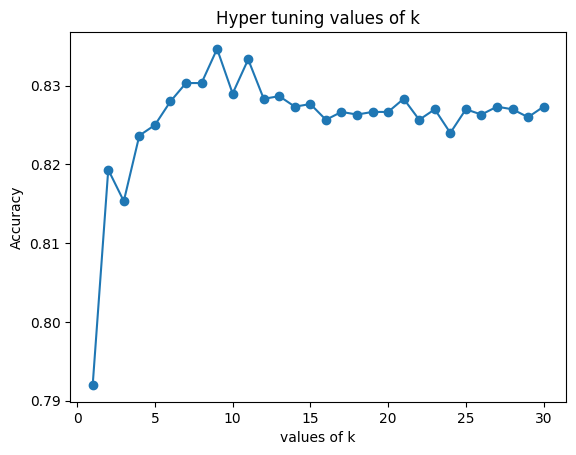

In [110]:
plt.title('Hyper tuning values of k')
plt.plot(range(1,31),ac_list,marker='o')
plt.xlabel('values of k')
plt.ylabel('Accuracy')
plt.show()

In [111]:
#as you can see at 8 the accuracy is high..
#lets make k=8
knn=KNeighborsClassifier(n_neighbors=8) #this is my K value #step2=making object #k=11
knn.fit(xtrain,ytrain) #step3=traing the data
ypred100=knn.predict(xtest) #step4=predicting value

In [112]:
print(classification_report(ytest,ypred100))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2373
           1       0.75      0.29      0.41       627

    accuracy                           0.83      3000
   macro avg       0.79      0.63      0.66      3000
weighted avg       0.82      0.83      0.80      3000



In [113]:
knn.score(xtrain,ytrain)

0.8565714285714285

In [114]:
knn.score(xtest,ytest)

0.8303333333333334

# Conclusion 

As per the above model we can conclude that the SVM model is best model compare to other and it is also perfect fit model..

# Evalute the model

In [115]:
svm.predict([[792,1,24,1,10,100000,3,1,1,10000]])

array([1])

so as per our model if CreditScore=792 Geography=France Gender=Male Age=24 Tenure=1 Balance=100000 NumOfProducts=1 HasCrCard=Yes IsActiveMember=1 EstimatedSalary=10000 so Binary flag 1 means the customer closed account with bank 

In [116]:
svm.predict([[500,2,0,19,10,1000,3,1,1,10000]])

array([0])

so as per our model if CreditScore=500 Geography=Spain Gender=FeMale Age=19 Tenure=10 Balance=1000 NumOfProducts=3 HasCrCard=Yes IsActiveMember=1 EstimatedSalary=10000 so Binary flag 0 means the customer retained with bank 

## ✅ Conclusion

- KNN performs well after feature scaling.
- Hyperparameter tuning improves model stability.
- Future improvements:
  - Try advanced models (Random Forest, XGBoost)
  - Use SMOTE for imbalance handling
  - Deploy model using Streamlit